In [3]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [6]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [8]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [9]:
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
X_train = X_train/255
X_test = X_test/255

In [11]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [12]:
print("Class label of first image :", y_train[0])
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.initializers import he_normal
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

In [0]:
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

MLP + ReLu + Adam + BN + Dropout (2 Layer Architecture 784-168-472-10)

In [15]:
model = Sequential()
model.add(Dense(168, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(472, activation='relu', kernel_initializer=he_normal(seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(output_dim, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 168)               131880    
_________________________________________________________________
batch_normalization_1 (Batch (None, 168)               672       
_________________________________________________________________
dropout_1 (Dropout)          (None, 168)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 472)               79768     
_________________________________________________________________
batch_normalization_2 (Batch (None, 472)               1888      
_________________________________________________________________
dropout_2 (Dropout)  

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history12 = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.5309 - acc: 0.8404 - val_loss: 0.1689 - val_acc: 0.9465
Epoch 2/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.2657 - acc: 0.9189 - val_loss: 0.1209 - val_acc: 0.9628
Epoch 3/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.2060 - acc: 0.9380 - val_loss: 0.1113 - val_acc: 0.9667
Epoch 4/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.1781 - acc: 0.9449 - val_loss: 0.1012 - val_acc: 0.9698
Epoch 5/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.1624 - acc: 0.9501 - val_loss: 0.0936 - val_acc: 0.9709
Epoch 6/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.1478 - acc: 0.9546 - val_loss: 0.0869 - val_acc: 0.9730
Epoch 7/20
60000/60000 [==============================] - 6s 93us/step - loss: 

Test score: 0.06125014309256803
Test accuracy: 0.9811


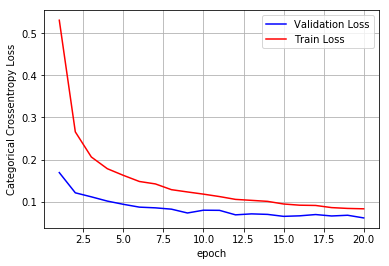

In [17]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history12.history['val_loss']
ty = history12.history['loss']
plt_dynamic(x, vy, ty, ax)

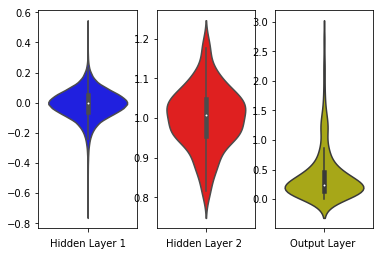

In [18]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [19]:
model = Sequential()
model.add(Dense(168, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(472, activation='relu', kernel_initializer=he_normal(seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(output_dim, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 168)               131880    
_________________________________________________________________
batch_normalization_3 (Batch (None, 168)               672       
_________________________________________________________________
dropout_3 (Dropout)          (None, 168)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 472)               79768     
_________________________________________________________________
batch_normalization_4 (Batch (None, 472)               1888      
_________________________________________________________________
dropout_4 (Dropout)          (None, 472)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                4730      
Total para

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history12 = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.3632 - acc: 0.8885 - val_loss: 0.1343 - val_acc: 0.9599
Epoch 2/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.1718 - acc: 0.9475 - val_loss: 0.1060 - val_acc: 0.9678
Epoch 3/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.1371 - acc: 0.9572 - val_loss: 0.0841 - val_acc: 0.9740
Epoch 4/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.1157 - acc: 0.9639 - val_loss: 0.0757 - val_acc: 0.9753
Epoch 5/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0997 - acc: 0.9682 - val_loss: 0.0757 - val_acc: 0.9759
Epoch 6/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.0889 - acc: 0.9715 - val_loss: 0.0743 - val_acc: 0.9754
Epoch 7/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.0803 - acc: 0.9745 - val_loss: 0.0707 - val_ac

Test score: 0.06603560918954463
Test accuracy: 0.9815


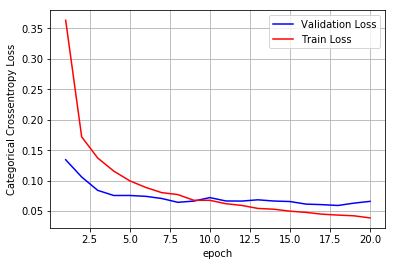

In [21]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history12.history['val_loss']
ty = history12.history['loss']
plt_dynamic(x, vy, ty, ax)

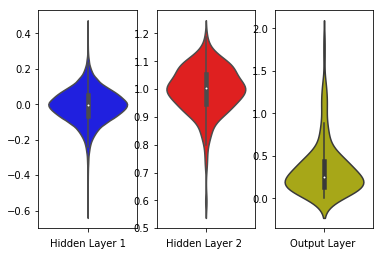

In [22]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [23]:
model = Sequential()
model.add(Dense(168, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.8))

model.add(Dense(472, activation='relu', kernel_initializer=he_normal(seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.8))

model.add(Dense(output_dim, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 168)               131880    
_________________________________________________________________
batch_normalization_5 (Batch (None, 168)               672       
_________________________________________________________________
dropout_5 (Dropout)          (None, 168)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 472)               79768     
_________________________________________________________________
batch_normalization_6 (Batch (None, 472)               1888      
_________________________________________________________________
dropout_6 (Dropout)          (None, 472)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                4730      
Total para

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history12 = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.9308 - acc: 0.7284 - val_loss: 0.2600 - val_acc: 0.9229
Epoch 2/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.4476 - acc: 0.8645 - val_loss: 0.2060 - val_acc: 0.9379
Epoch 3/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.3667 - acc: 0.8892 - val_loss: 0.1710 - val_acc: 0.9472
Epoch 4/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.3209 - acc: 0.9027 - val_loss: 0.1559 - val_acc: 0.9508
Epoch 5/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.2912 - acc: 0.9120 - val_loss: 0.1468 - val_acc: 0.9554
Epoch 6/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.2716 - acc: 0.9183 - val_loss: 0.1301 - val_acc: 0.9608
Epoch 7/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.2589 - acc: 0.9222 - val_loss: 0.1295 - val_ac

Test score: 0.09341368079553358
Test accuracy: 0.9734


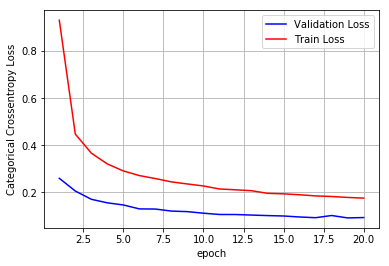

In [25]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history12.history['val_loss']
ty = history12.history['loss']
plt_dynamic(x, vy, ty, ax)

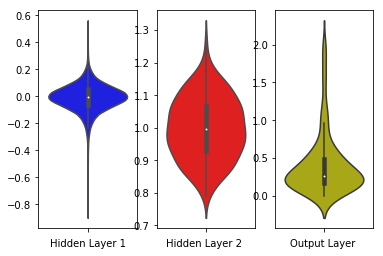

In [26]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

MLP + ReLu + Adam + BN + Dropout (3 Layer Architecture 784-352-164-124-10)

In [27]:
model=Sequential()
model.add(Dense(352, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(164, activation='relu', kernel_initializer=he_normal(seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.5))
                          
model.add(Dense(124, activation='relu', kernel_initializer=he_normal(seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(output_dim, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 352)               276320    
_________________________________________________________________
batch_normalization_7 (Batch (None, 352)               1408      
_________________________________________________________________
dropout_7 (Dropout)          (None, 352)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 164)               57892     
_________________________________________________________________
batch_normalization_8 (Batch (None, 164)               656       
_________________________________________________________________
dropout_8 (Dropout)          (None, 164)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 124)               20460     
__________

In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history23 = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.6714 - acc: 0.7932 - val_loss: 0.1917 - val_acc: 0.9394
Epoch 2/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.2927 - acc: 0.9146 - val_loss: 0.1355 - val_acc: 0.9571
Epoch 3/20
60000/60000 [==============================] - 8s 125us/step - loss: 0.2240 - acc: 0.9342 - val_loss: 0.1133 - val_acc: 0.9652
Epoch 4/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.1917 - acc: 0.9447 - val_loss: 0.1022 - val_acc: 0.9695
Epoch 5/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.1707 - acc: 0.9501 - val_loss: 0.0888 - val_acc: 0.9744
Epoch 6/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.1495 - acc: 0.9568 - val_loss: 0.0853 - val_acc: 0.9756
Epoch 7/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.1407 - acc: 0.9587 - val_loss: 0.0783 - 

Test score: 0.0620166264391155
Test accuracy: 0.9826


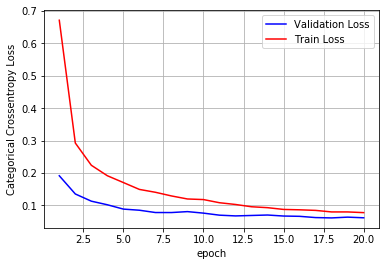

In [29]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history23.history['val_loss']
ty = history23.history['loss']
plt_dynamic(x, vy, ty, ax)

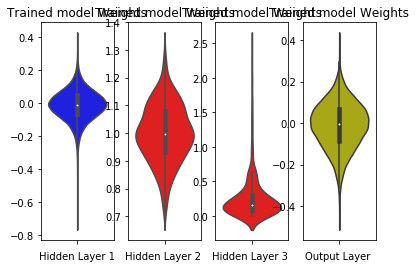

In [30]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [31]:
model=Sequential()
model.add(Dense(352, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(164, activation='relu', kernel_initializer=he_normal(seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.2))
                          
model.add(Dense(124, activation='relu', kernel_initializer=he_normal(seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(output_dim, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 352)               276320    
_________________________________________________________________
batch_normalization_10 (Batc (None, 352)               1408      
_________________________________________________________________
dropout_10 (Dropout)         (None, 352)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 164)               57892     
_________________________________________________________________
batch_normalization_11 (Batc (None, 164)               656       
_________________________________________________________________
dropout_11 (Dropout)         (None, 164)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 124)               20460     
__________

In [32]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history23 = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.3156 - acc: 0.9035 - val_loss: 0.1150 - val_acc: 0.9647
Epoch 2/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.1418 - acc: 0.9563 - val_loss: 0.0886 - val_acc: 0.9722
Epoch 3/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.1045 - acc: 0.9683 - val_loss: 0.0775 - val_acc: 0.9756
Epoch 4/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.0895 - acc: 0.9719 - val_loss: 0.0744 - val_acc: 0.9778
Epoch 5/20
60000/60000 [==============================] - 8s 125us/step - loss: 0.0751 - acc: 0.9763 - val_loss: 0.0699 - val_acc: 0.9778
Epoch 6/20
60000/60000 [==============================] - 8s 129us/step - loss: 0.0638 - acc: 0.9796 - val_loss: 0.0710 - val_acc: 0.9781
Epoch 7/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.0620 - acc: 0.9796 - val_loss: 0.0725 - 

Test score: 0.0696625495184242
Test accuracy: 0.9801


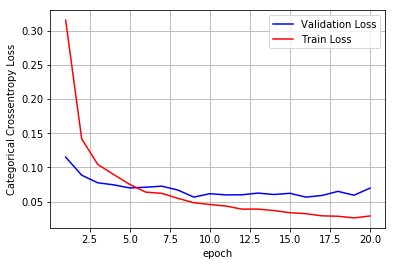

In [33]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history23.history['val_loss']
ty = history23.history['loss']
plt_dynamic(x, vy, ty, ax)

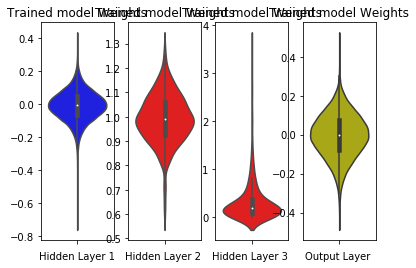

In [34]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [35]:
model=Sequential()
model.add(Dense(352, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.8))

model.add(Dense(164, activation='relu', kernel_initializer=he_normal(seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.8))
                          
model.add(Dense(124, activation='relu', kernel_initializer=he_normal(seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.8))

model.add(Dense(output_dim, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 352)               276320    
_________________________________________________________________
batch_normalization_13 (Batc (None, 352)               1408      
_________________________________________________________________
dropout_13 (Dropout)         (None, 352)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 164)               57892     
_________________________________________________________________
batch_normalization_14 (Batc (None, 164)               656       
_________________________________________________________________
dropout_14 (Dropout)         (None, 164)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 124)               20460     
__________

In [36]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history23 = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 159us/step - loss: 2.3291 - acc: 0.3203 - val_loss: 0.8520 - val_acc: 0.7836
Epoch 2/20
60000/60000 [==============================] - 8s 127us/step - loss: 1.1387 - acc: 0.5952 - val_loss: 0.4971 - val_acc: 0.8783
Epoch 3/20
60000/60000 [==============================] - 8s 125us/step - loss: 0.8513 - acc: 0.7194 - val_loss: 0.3424 - val_acc: 0.9115
Epoch 4/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.6934 - acc: 0.7846 - val_loss: 0.2719 - val_acc: 0.9247
Epoch 5/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.5955 - acc: 0.8227 - val_loss: 0.2339 - val_acc: 0.9323
Epoch 6/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.5358 - acc: 0.8453 - val_loss: 0.2122 - val_acc: 0.9393
Epoch 7/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.4925 - acc: 0.8616 - val_loss: 0.1982 -

Test score: 0.13190246427785604
Test accuracy: 0.9647


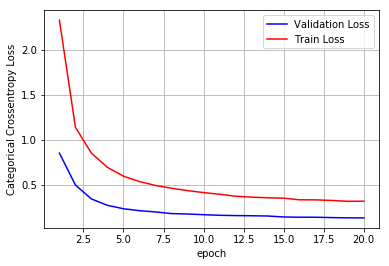

In [37]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history23.history['val_loss']
ty = history23.history['loss']
plt_dynamic(x, vy, ty, ax)

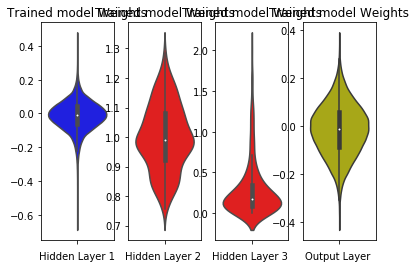

In [38]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

MLP + ReLu + Adam + BN + Dropout (5 Layer Architecture 784-216-170-136-80-38-10)

In [39]:
model=Sequential()
model.add(Dense(216, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(170, activation='relu', kernel_initializer=he_normal(seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.5))
                                                    
model.add(Dense(136, activation='relu', kernel_initializer=he_normal(seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(80, activation='relu', kernel_initializer=he_normal(seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.5))
                                                    
model.add(Dense(38, activation='relu', kernel_initializer=he_normal(seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(output_dim, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 216)               169560    
_________________________________________________________________
batch_normalization_16 (Batc (None, 216)               864       
_________________________________________________________________
dropout_16 (Dropout)         (None, 216)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 170)               36890     
_________________________________________________________________
batch_normalization_17 (Batc (None, 170)               680       
_________________________________________________________________
dropout_17 (Dropout)         (None, 170)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 136)               23256     
__________

In [40]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history23 = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 171us/step - loss: 1.5948 - acc: 0.4750 - val_loss: 0.4692 - val_acc: 0.8639
Epoch 2/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.6977 - acc: 0.7849 - val_loss: 0.2683 - val_acc: 0.9261
Epoch 3/20
60000/60000 [==============================] - 7s 125us/step - loss: 0.4856 - acc: 0.8690 - val_loss: 0.1942 - val_acc: 0.9458
Epoch 4/20
60000/60000 [==============================] - 8s 129us/step - loss: 0.3871 - acc: 0.9016 - val_loss: 0.1629 - val_acc: 0.9579
Epoch 5/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.3379 - acc: 0.9157 - val_loss: 0.1492 - val_acc: 0.9595
Epoch 6/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.3034 - acc: 0.9250 - val_loss: 0.1330 - val_acc: 0.9646
Epoch 7/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.2787 - acc: 0.9325 - val_loss: 0.1354 -

Test score: 0.09488777558589354
Test accuracy: 0.9769


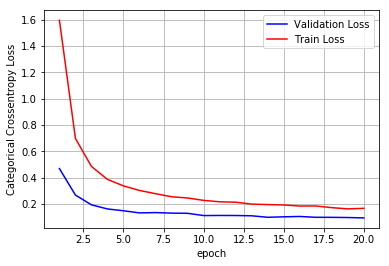

In [41]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history23.history['val_loss']
ty = history23.history['loss']
plt_dynamic(x, vy, ty, ax)

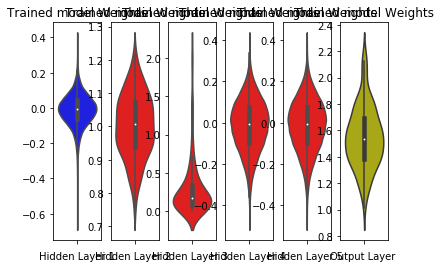

In [42]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [43]:
model=Sequential()
model.add(Dense(216, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(170, activation='relu', kernel_initializer=he_normal(seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.2))
                                                    
model.add(Dense(136, activation='relu', kernel_initializer=he_normal(seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(80, activation='relu', kernel_initializer=he_normal(seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.2))
                                                    
model.add(Dense(38, activation='relu', kernel_initializer=he_normal(seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(output_dim, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 216)               169560    
_________________________________________________________________
batch_normalization_21 (Batc (None, 216)               864       
_________________________________________________________________
dropout_21 (Dropout)         (None, 216)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 170)               36890     
_________________________________________________________________
batch_normalization_22 (Batc (None, 170)               680       
_________________________________________________________________
dropout_22 (Dropout)         (None, 170)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 136)               23256     
__________

In [44]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history23 = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 175us/step - loss: 0.5880 - acc: 0.8248 - val_loss: 0.1732 - val_acc: 0.9498
Epoch 2/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.2234 - acc: 0.9370 - val_loss: 0.1184 - val_acc: 0.9661
Epoch 3/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.1694 - acc: 0.9514 - val_loss: 0.1012 - val_acc: 0.9715
Epoch 4/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.1393 - acc: 0.9600 - val_loss: 0.0908 - val_acc: 0.9727
Epoch 5/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.1253 - acc: 0.9645 - val_loss: 0.0816 - val_acc: 0.9767
Epoch 6/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.1131 - acc: 0.9676 - val_loss: 0.0828 - val_acc: 0.9766
Epoch 7/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.1014 - acc: 0.9713 - val_loss: 0.0819 -

Test score: 0.06503258371697739
Test accuracy: 0.9834


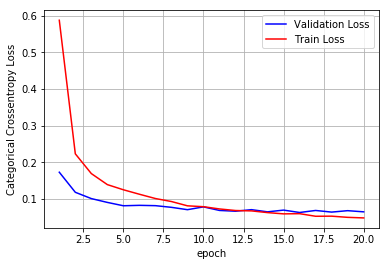

In [45]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history23.history['val_loss']
ty = history23.history['loss']
plt_dynamic(x, vy, ty, ax)

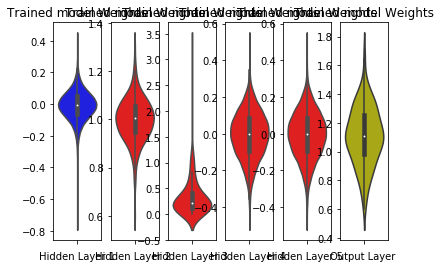

In [46]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [47]:
model=Sequential()
model.add(Dense(216, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.8))

model.add(Dense(170, activation='relu', kernel_initializer=he_normal(seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.8))
                                                    
model.add(Dense(136, activation='relu', kernel_initializer=he_normal(seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.8))

model.add(Dense(80, activation='relu', kernel_initializer=he_normal(seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.8))
                                                    
model.add(Dense(38, activation='relu', kernel_initializer=he_normal(seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.8))

model.add(Dense(output_dim, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 216)               169560    
_________________________________________________________________
batch_normalization_26 (Batc (None, 216)               864       
_________________________________________________________________
dropout_26 (Dropout)         (None, 216)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 170)               36890     
_________________________________________________________________
batch_normalization_27 (Batc (None, 170)               680       
_________________________________________________________________
dropout_27 (Dropout)         (None, 170)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 136)               23256     
__________

In [48]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history23 = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 188us/step - loss: 2.9871 - acc: 0.1053 - val_loss: 2.3135 - val_acc: 0.1135
Epoch 2/20
60000/60000 [==============================] - 8s 130us/step - loss: 2.2723 - acc: 0.1475 - val_loss: 2.3420 - val_acc: 0.1135
Epoch 3/20
60000/60000 [==============================] - 8s 126us/step - loss: 2.1364 - acc: 0.1918 - val_loss: 2.2887 - val_acc: 0.1358
Epoch 4/20
60000/60000 [==============================] - 8s 126us/step - loss: 2.0281 - acc: 0.2190 - val_loss: 2.1321 - val_acc: 0.1821
Epoch 5/20
60000/60000 [==============================] - 7s 125us/step - loss: 1.9156 - acc: 0.2463 - val_loss: 1.7242 - val_acc: 0.3085
Epoch 6/20
60000/60000 [==============================] - 8s 125us/step - loss: 1.7868 - acc: 0.2807 - val_loss: 1.5540 - val_acc: 0.3138
Epoch 7/20
60000/60000 [==============================] - 8s 126us/step - loss: 1.6934 - acc: 0.3031 - val_loss: 1.5104 -

Test score: 1.0241631193161012
Test accuracy: 0.575


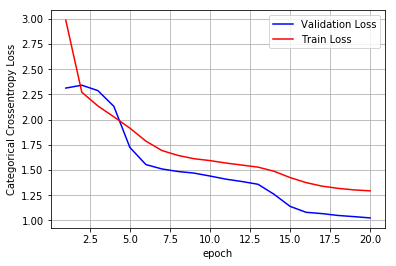

In [49]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history23.history['val_loss']
ty = history23.history['loss']
plt_dynamic(x, vy, ty, ax)

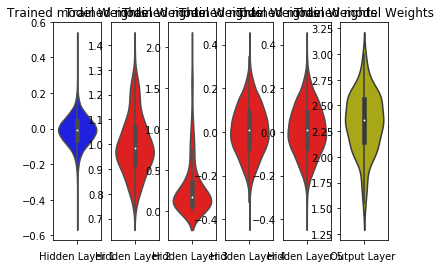

In [50]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [51]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Architecture", "Dropout Rate", "Test Score", "Test Accuracy"]
x.add_row(["2 Layer Architecture 784-168-472-10", "0.5 ", 0.06, 0.98])
x.add_row(["2 Layer Architecture 784-168-472-10", "0.2 ", 0.06, 0.98])
x.add_row(["2 Layer Architecture 784-168-472-10", "0.8 ", 0.09, 0.97])
x.add_row(["3 Layer Architecture 784-352-164-124-10", "0.5", 0.06, 0.98])
x.add_row(["3 Layer Architecture 784-352-164-124-10", "0.2", 0.06, 0.98])
x.add_row(["3 Layer Architecture 784-352-164-124-10","0.8", 0.13, 0.96])
x.add_row(["5 Layer Architecture 784-216-170-136-80-38-10", "0.5", 0.09, 0.97])
x.add_row(["5 Layer Architecture 784-216-170-136-80-38-10", "0.2", 0.06, 0.98])
x.add_row(["5 Layer Architecture 784-216-170-136-80-38-10", "0.8", 1.02, 0.57])
print(x)

+-----------------------------------------------+--------------+------------+---------------+
|                  Architecture                 | Dropout Rate | Test Score | Test Accuracy |
+-----------------------------------------------+--------------+------------+---------------+
|      2 Layer Architecture 784-168-472-10      |     0.5      |    0.06    |      0.98     |
|      2 Layer Architecture 784-168-472-10      |     0.2      |    0.06    |      0.98     |
|      2 Layer Architecture 784-168-472-10      |     0.8      |    0.09    |      0.97     |
|    3 Layer Architecture 784-352-164-124-10    |     0.5      |    0.06    |      0.98     |
|    3 Layer Architecture 784-352-164-124-10    |     0.2      |    0.06    |      0.98     |
|    3 Layer Architecture 784-352-164-124-10    |     0.8      |    0.13    |      0.96     |
| 5 Layer Architecture 784-216-170-136-80-38-10 |     0.5      |    0.09    |      0.97     |
| 5 Layer Architecture 784-216-170-136-80-38-10 |     0.2   